In [1]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import yfinance as yf
from environments.discrete_env_v1 import PortfolioManagementEnv

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import risk_matrix
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import plotting

(CVXPY) Mar 10 03:51:11 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [3]:
df = pd.read_csv('data/dow_10_returns.csv', index_col=0, parse_dates=True)
df.head()

,RF_RETURN,AXP_RETURN,AAPL_RETURN,BA_RETURN,GS_RETURN,INTC_RETURN,JNJ_RETURN,KO_RETURN,NKE_RETURN,PG_RETURN,DIS_RETURN
2010-01-04,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000146,-0.002199,0.001729,0.032752,0.017680,-0.000479,-0.011595,-0.012097,0.003979,0.000327,-0.002494
2010-01-06,0.000148,0.016165,-0.015906,0.030334,-0.010674,-0.003354,0.008133,-0.000355,-0.006097,-0.004743,-0.005314
2010-01-07,0.000149,0.016219,-0.001849,0.040482,0.019568,-0.009615,-0.007137,-0.002485,0.009815,-0.005423,0.000314
2010-01-08,0.000148,-0.000715,0.006649,-0.009646,-0.018911,0.011165,0.003439,-0.018509,-0.001975,-0.001322,0.001571


In [35]:
(mean_historical_return(df, returns_data=True) == (1+df).prod()**(252/len(df))-1).all()

True

In [34]:
(risk_matrix(df, returns_data=True) == df.cov() * 252).all().all()

True

In [36]:
mean_historical_return(df, returns_data=True)

RF_RETURN      0.022434
AXP_RETURN     0.120328
AAPL_RETURN    0.259231
BA_RETURN      0.119914
GS_RETURN      0.071035
INTC_RETURN    0.050040
JNJ_RETURN     0.112452
KO_RETURN      0.097168
NKE_RETURN     0.177721
PG_RETURN      0.105029
DIS_RETURN     0.091322
dtype: float64

In [37]:
risk_matrix(df, returns_data=True)

,RF_RETURN,AXP_RETURN,AAPL_RETURN,BA_RETURN,GS_RETURN,INTC_RETURN,JNJ_RETURN,KO_RETURN,NKE_RETURN,PG_RETURN,DIS_RETURN
RF_RETURN,2.051085e-07,-5.272974e-08,-0.000003,0.000003,-0.000003,-1.623903e-07,-6.273217e-07,5.019786e-07,-1.803636e-07,-6.350466e-07,-0.000002
AXP_RETURN,-5.272974e-08,8.711068e-02,0.036198,0.065599,0.057482,4.084715e-02,2.138107e-02,2.564672e-02,3.989507e-02,1.903989e-02,0.046338
AAPL_RETURN,-2.537068e-06,3.619786e-02,0.082435,0.042091,0.036661,4.272481e-02,1.753517e-02,1.805513e-02,3.436696e-02,1.807647e-02,0.031800
BA_RETURN,3.235138e-06,6.559873e-02,0.042091,0.132893,0.057092,4.656117e-02,2.130542e-02,2.785277e-02,4.427496e-02,1.883985e-02,0.050319
GS_RETURN,-3.368548e-06,5.748161e-02,0.036661,0.057092,0.084854,4.127909e-02,2.030859e-02,2.103932e-02,3.612607e-02,1.780358e-02,0.042570
INTC_RETURN,-1.623903e-07,4.084715e-02,0.042725,0.046561,0.041279,8.718790e-02,1.947407e-02,2.050342e-02,3.325609e-02,1.927676e-02,0.034480
JNJ_RETURN,-6.273217e-07,2.138107e-02,0.017535,0.021305,0.020309,1.947407e-02,2.832477e-02,1.565509e-02,1.707098e-02,1.655813e-02,0.017134
KO_RETURN,5.019786e-07,2.564672e-02,0.018055,0.027853,0.021039,2.050342e-02,1.565509e-02,3.078284e-02,1.977992e-02,1.853701e-02,0.021364
NKE_RETURN,-1.803636e-07,3.989507e-02,0.034367,0.044275,0.036126,3.325609e-02,1.707098e-02,1.977992e-02,7.622078e-02,1.732589e-02,0.035130
PG_RETURN,-6.350466e-07,1.903989e-02,0.018076,0.018840,0.017804,1.927676e-02,1.655813e-02,1.853701e-02,1.732589e-02,3.026168e-02,0.017196


In [111]:
returns = df.AAPL_RETURN

In [112]:
rf = 0.03

In [113]:
annual_return = (1+returns).prod() ** (252/len(returns)) - 1
annual_risk = returns.std() * np.sqrt(252)
sharpe_ratio = (annual_return - rf) / annual_risk
print(sharpe_ratio)

0.798395924815534


In [114]:
annual_return = (1+returns).prod() ** (252/len(returns)) - 1
annual_risk_neg = returns[returns<0].std() * np.sqrt(252)
sortino_ratio = (annual_return - rf) / annual_risk_neg
print(sortino_ratio)

1.1119993906967374


Max drawdown quantifies the steepest decline from peak to trough observed for an investment. This is useful for a number of reasons, mainly the fact that it doesn't rely on the underlying returns being normally distributed. It also gives us an indication of conditionality amongst the returns increments. Whereas in the previous ratios, we only considered the overall reward relative to risk, however, it may be that consecutive returns are not independent leading to unacceptably high losses of a given period of time.

0.5918897021285686


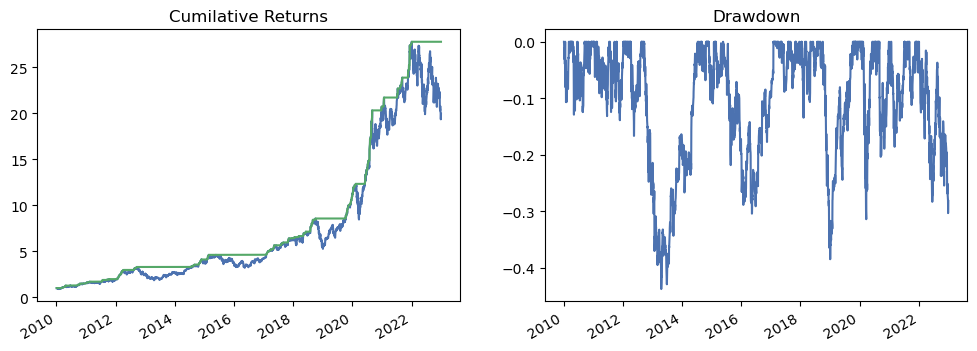

In [115]:
cumilative_returns = (returns+1).cumprod()
cumilative_returns_peak = cumilative_returns.expanding(min_periods=1).max()
drawdown = (cumilative_returns / cumilative_returns_peak) - 1

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
cumilative_returns.plot(ax=axes[0], title='Cumilative Returns');
cumilative_returns_peak.plot(ax=axes[0]);
drawdown.plot(ax=axes[1], title='Drawdown');

max_drawdown = drawdown.min() # most negative drawdown
annual_return = (1+returns).prod() ** (252/len(returns)) - 1
calmar_ratio = annual_return / abs(max_drawdown)
print(calmar_ratio)